In [37]:
#import some libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)

Path to dataset files: /Users/yemasuperez/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [ ]:
# config visualization
#plt.style.use('ggplot')
EXTENDED_PALETTE = ['#43AA8B', '#9D44B5', '#2A9D8F', '#7B68EE', '#20B2AA', '#9370DB']
#sns.set_palette(EXTENDED_PALETTE)
#%matplotlib inline

# Al inicio de todo
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_palette(EXTENDED_PALETTE)

# Configuración personalizada
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'

In [39]:
#Check the download folder's content.
import os
#list all files 
print(os.listdir(path))

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [40]:
#Use pandas for read the file 
import pandas as pd
#Build the full path to the CSV file
csv_path = os.path.join(path,"WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(csv_path)
df.head()#check the data 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2. ANÁLISIS EXPLORATORIO DE DATOS (EDA)

In [41]:

# basic information 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
# Descriptive statistic
print(df.describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [43]:
# Check null values
print("Null value per columns:")
print(df.isnull().sum())

Null value per columns:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [44]:
#Checking unique categorical values 
print('Unique categorical values on columns')
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")
    print("-" * 30)

Unique categorical values on columns
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
------------------------------
gender: ['Female' 'Male']
------------------------------
Partner: ['Yes' 'No']
------------------------------
Dependents: ['No' 'Yes']
------------------------------
PhoneService: ['No' 'Yes']
------------------------------
MultipleLines: ['No phone service' 'No' 'Yes']
------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
------------------------------
OnlineSecurity: ['No' 'Yes' 'No internet service']
------------------------------
OnlineBackup: ['Yes' 'No' 'No internet service']
------------------------------
DeviceProtection: ['No' 'Yes' 'No internet service']
------------------------------
TechSupport: ['No' 'Yes' 'No internet service']
------------------------------
StreamingTV: ['No' 'Yes' 'No internet service']
------------------------------
StreamingMovies: ['No' 'Yes' 'No internet service']
--

In [45]:
#convert TotalChange to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] ,errors='coerce')

#check the null values after 
print(f"null values in Total Changes is:{df['TotalCharges'].isnull().sum()}")


null values in Total Changes is:11


In [46]:
#Eliminate the nan values
df = df.dropna()

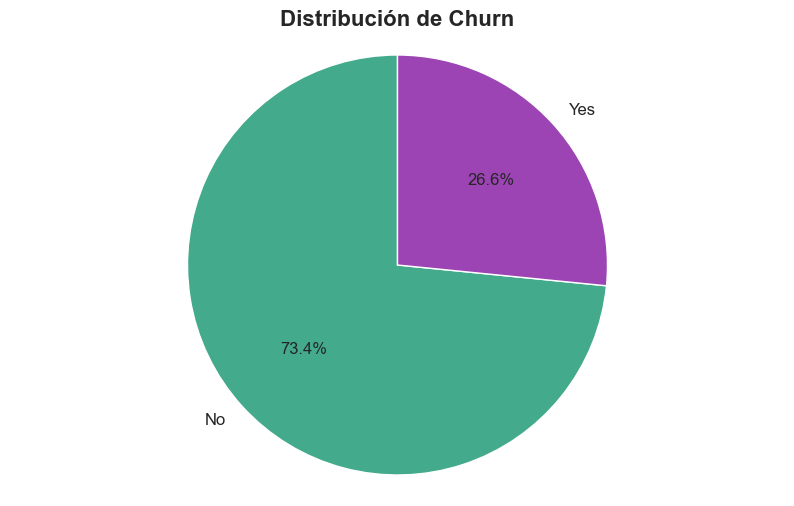

In [51]:
#Chrun distribution 
plt.figure(figsize=(10, 6))
churn_counts = df['Churn'].value_counts()
colors =['#43AA8B', '#9D44B5'] 
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribución de Churn')
plt.axis('equal')
plt.show()

In [48]:
print(f"Total clientes: {len(df)}")
print(f"Clientes que se quedan (No): {churn_counts['No']} ({churn_counts['No']/len(df)*100:.1f}%)")
print(f"Clientes que se van (Yes): {churn_counts['Yes']} ({churn_counts['Yes']/len(df)*100:.1f}%)")

Total clientes: 7032
Clientes que se quedan (No): 5163 (73.4%)
Clientes que se van (Yes): 1869 (26.6%)


### 3. Análisis de características demográficas

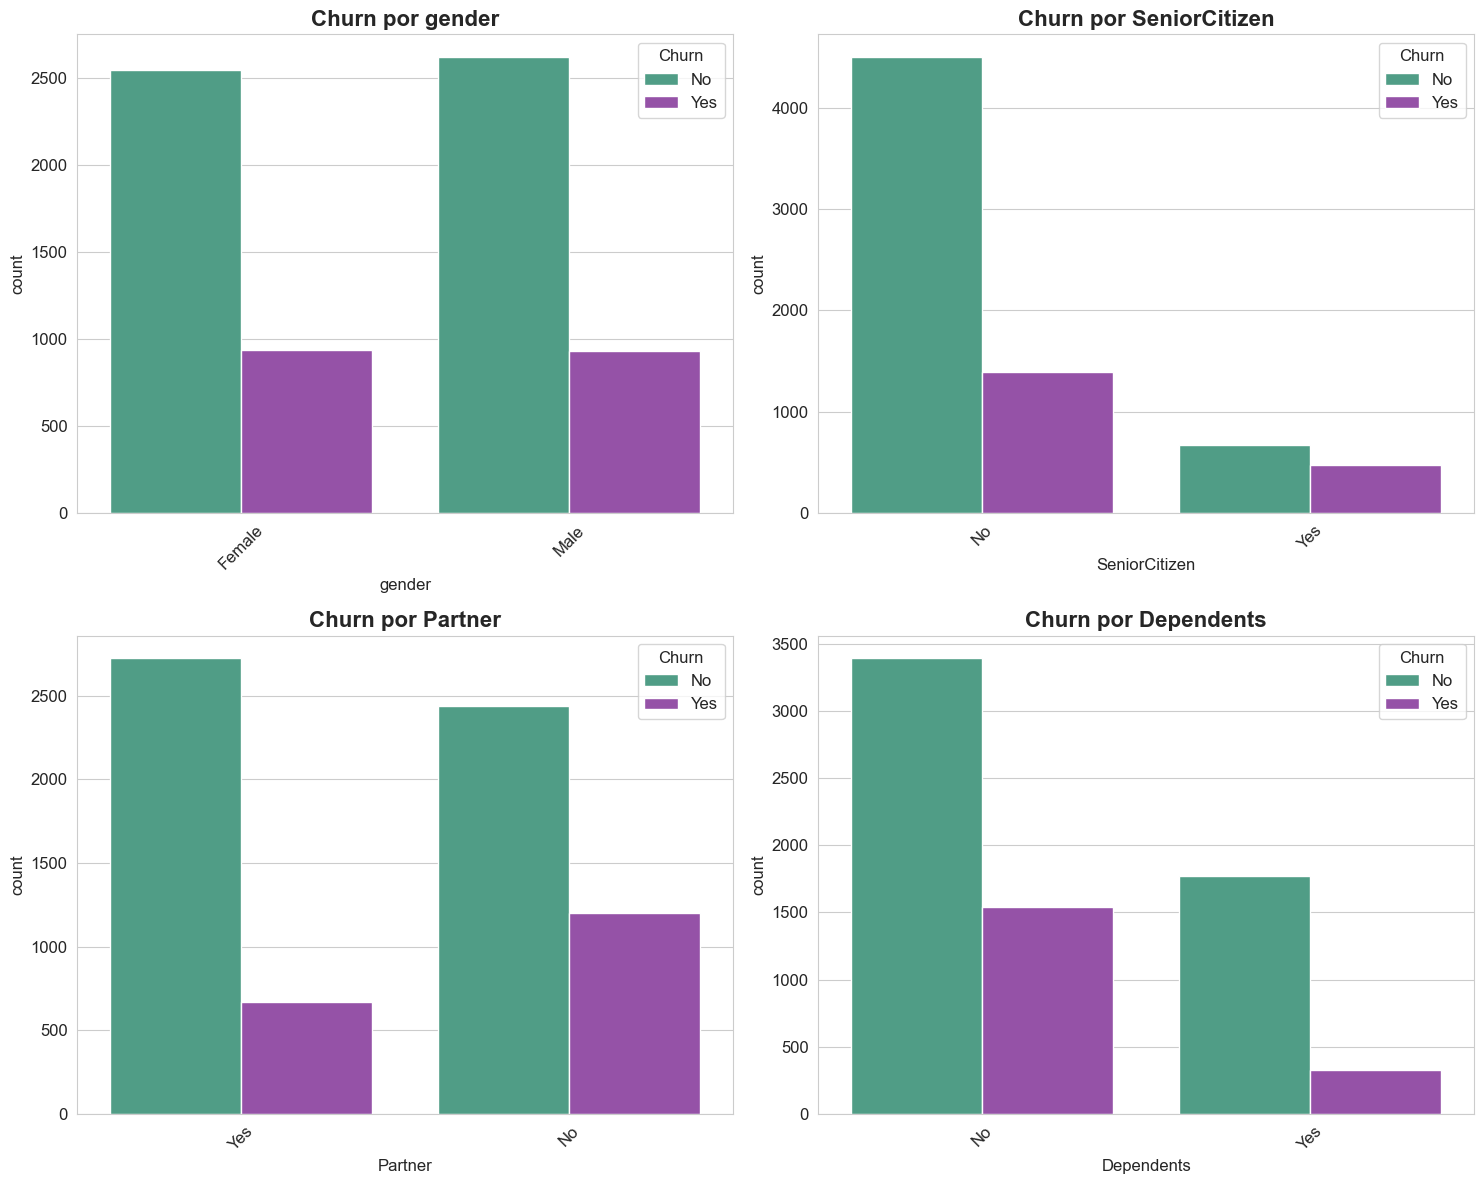

In [52]:
demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(demographic_cols):
    if col == 'SeniorCitizen':
        # Convertir a categórica para mejor visualización
        df_temp = df.copy()
        df_temp['SeniorCitizen'] = df_temp['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
        sns.countplot(data=df_temp, x=col, hue='Churn', ax=axes[i])
    else:
        sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    
    axes[i].set_title(f'Churn por {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()